In [1]:
# importing the required libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer 
from sklearn.cluster import KMeans 
from sklearn import metrics 



In [2]:
# reading the dataset 

data= pd.read_csv('marketing_campaign.csv' , sep ='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# getting the number of rows and columns of our dataset

data.shape

(2240, 29)

In [4]:
#--------- Getting lite summary of our data --------------------
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#----------------- Getting statistical summary of data --------

data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
#----------- Checking datatypes of features ------------------>
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [7]:
# checking for null values 

data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
#-------------- Dropping the null values ------------->

data.dropna(inplace = True)

In [9]:
# ----------- double check for null values after dropping ------------->
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [10]:
#------- The number of rows after removing the rows which contains null values ----------------->

data.shape

(2216, 29)

In [11]:
# converting the datatype of date which is in int to date time

data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])


C:\Users\DELL\AppData\Local\Temp\ipykernel_10768\2708402105.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])


In [12]:
# getting the first and last customer Date 

dates = []

for i in data.Dt_Customer :
    i = i.date()
    dates.append(i)


print("Date of first customer  :  ", min(dates))
print("Date of newest customer : ", max(dates ))

Date of first customer  :   2012-01-08
Date of newest customer :  2014-12-06


In [13]:
# getting a new feature which tell for how many days the customer shops with us 

days = []
maxd = max(dates)    
for i in dates :
    neww = maxd - i 
    days.append(neww)

data['Customer_for']  = days 
data.Customer_for = pd.to_numeric(data.Customer_for, errors = 'coerce')


In [14]:
# checking how many categorical features in our dataset 

categorical_features = data.columns[data.dtypes == 'object']
categorical_features 

Index(['Education', 'Marital_Status'], dtype='object')

In [15]:
# so first handle marital status 

# total categories in marital status feature 

print("Total categories in Marital status \n")
print(data.Marital_Status.value_counts())

print("\nTotal categories in Education column : \n")
print(data.Education.value_counts())


Total categories in Marital status 

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Total categories in Education column : 

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [16]:
# Feature engineering 


#  Age of customer 

data['Age'] = 2023- data['Year_Birth']

#  total spends 

data['Spent'] = data['MntWines'] + data.MntFruits + data.MntMeatProducts + data.MntFishProducts + data.MntSweetProducts + data.MntGoldProds

# checking that the customer is living alone or with the partner 

data['Living_with'] = data.Marital_Status.replace({
    'Married' : 'partner' , 'Together' : 'partner' , 'Absurd' : 'alone' ,
    'Widow' :'alone' , 'YOLO' :'alone' , 'Single' : 'alone'
})



#  Getting how many childrens living in the house 

data['Children'] = data['Kidhome'] + data['Teenhome']

# getting total members in house 
data['Living_with'] = data['Living_with'].replace({'alone': 1 , 'partner' : 2}, inplace= True)
data['Family_size'] = data['Living_with'] + data['Children']

# Dividing education level in three grps 
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

# for making analyzing easy changing some column names 

data = data.rename(columns = {
    'MntWines' : 'Wines' , 'MntFruits' : 'Fruits' ,'MntMeatProducts' : 'Meat',
    'MntFishProducts' : 'Fish' , 'MntSweetProducts' : 'Sweet',
    'MntGoldProds' : 'Gold'
})

# Dropping some non important columns :

data.drop(['Marital_Status' , 'Dt_Customer' , 'Z_CostContact' ,'Z_Revenue','Year_Birth','ID'], axis = 1 , inplace = True)

In [17]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_for,Age,Spent,Children
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,4.423735e+16,54.179603,607.075361,0.947202
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,27.000000,5.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.937600e+16,46.000000,69.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.432320e+16,53.000000,396.500000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.927040e+16,64.000000,1048.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.184320e+16,130.000000,2525.000000,3.000000


In [18]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweet,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_for,Age,Spent,Living_with,Children,Family_size
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,83894400000000000,66,1617,None,0,None
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,10800000000000000,69,27,None,2,None
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,40780800000000000,58,776,None,0,None
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,5616000000000000,39,53,None,1,None
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,27734400000000000,42,422,None,1,None


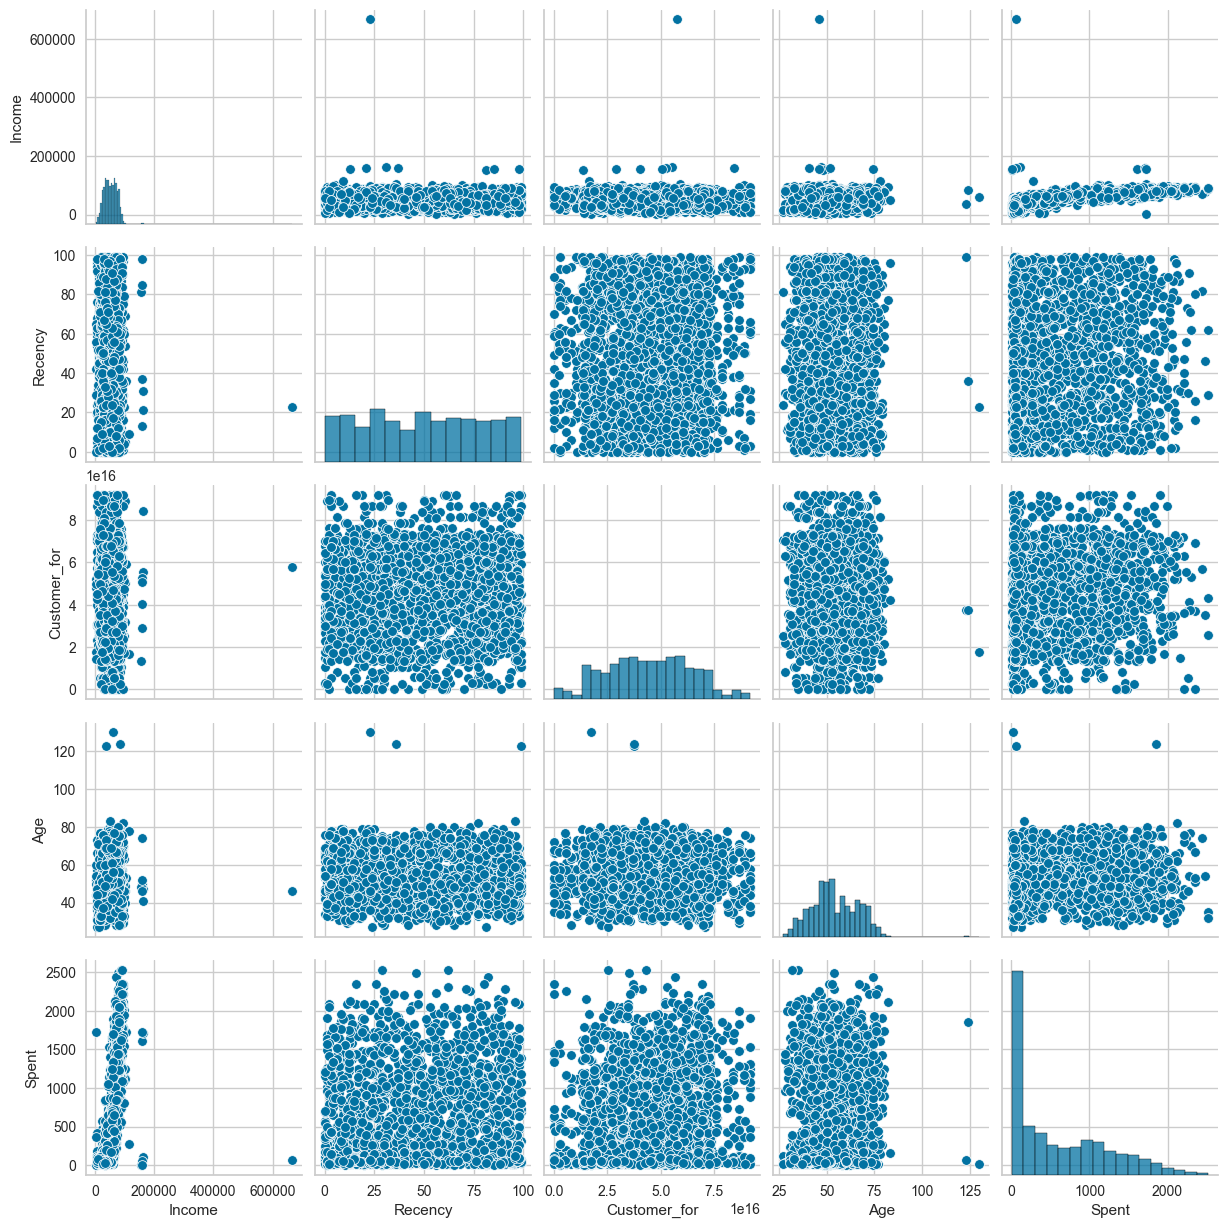

In [19]:
# lets plot some graphs 

sns.pairplot(data[['Income','Recency','Customer_for','Age','Spent']])

In [20]:
# #Dropping the outliers by setting a cap on Age and income. 
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]



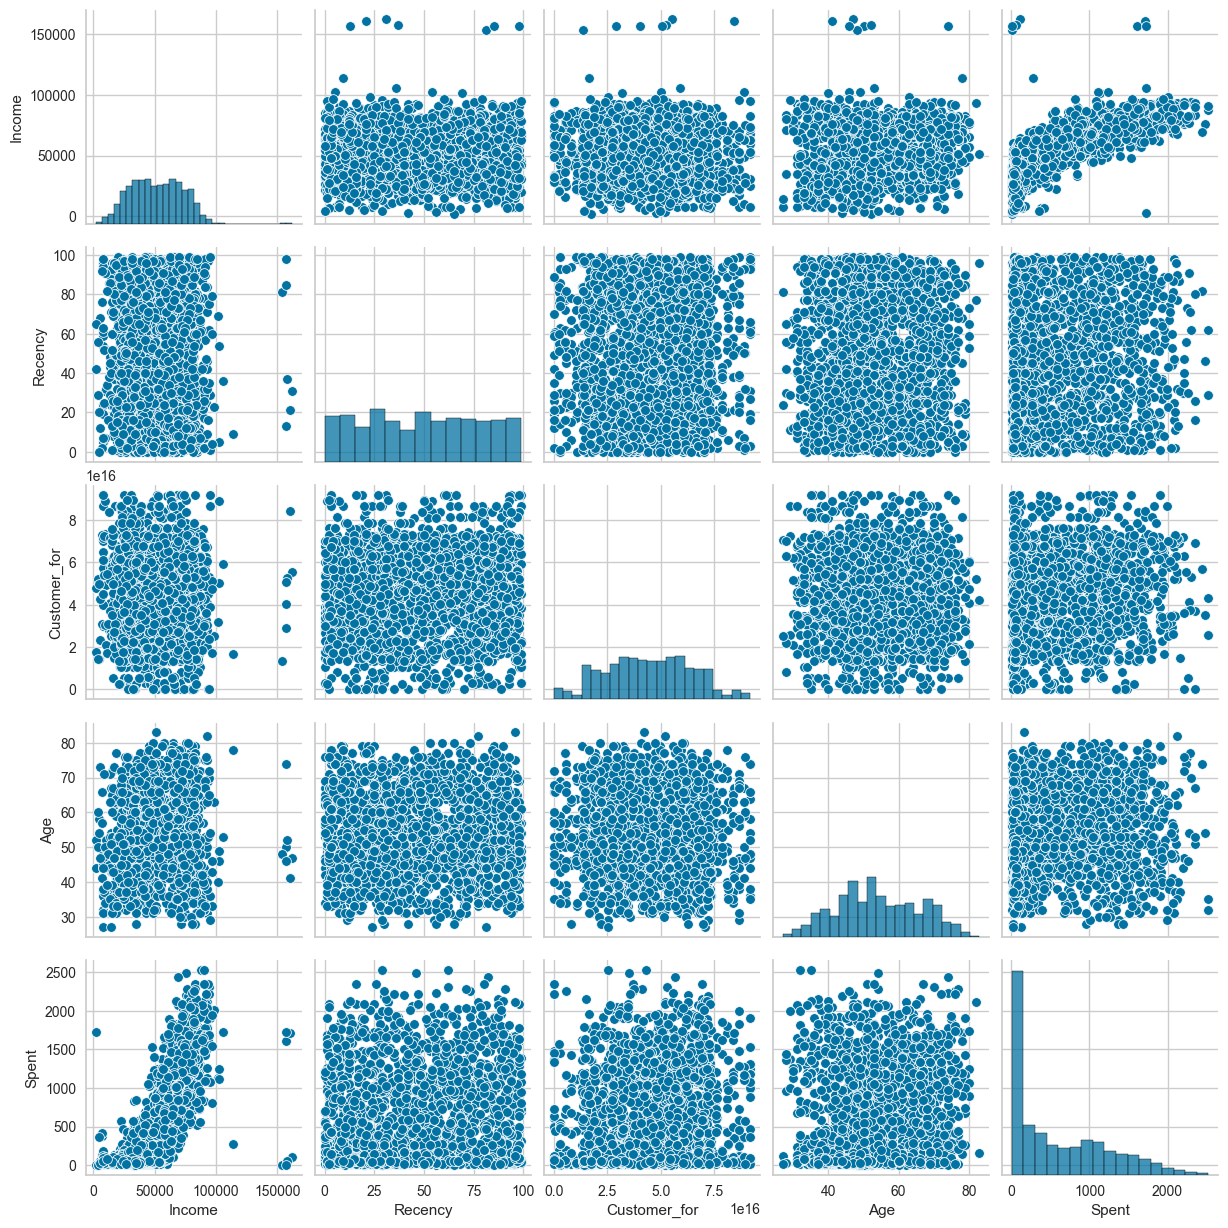

In [21]:
sns.pairplot(data[['Income','Recency','Customer_for','Age','Spent']])

C:\Users\DELL\AppData\Local\Temp\ipykernel_10768\803715028.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


<AxesSubplot: >

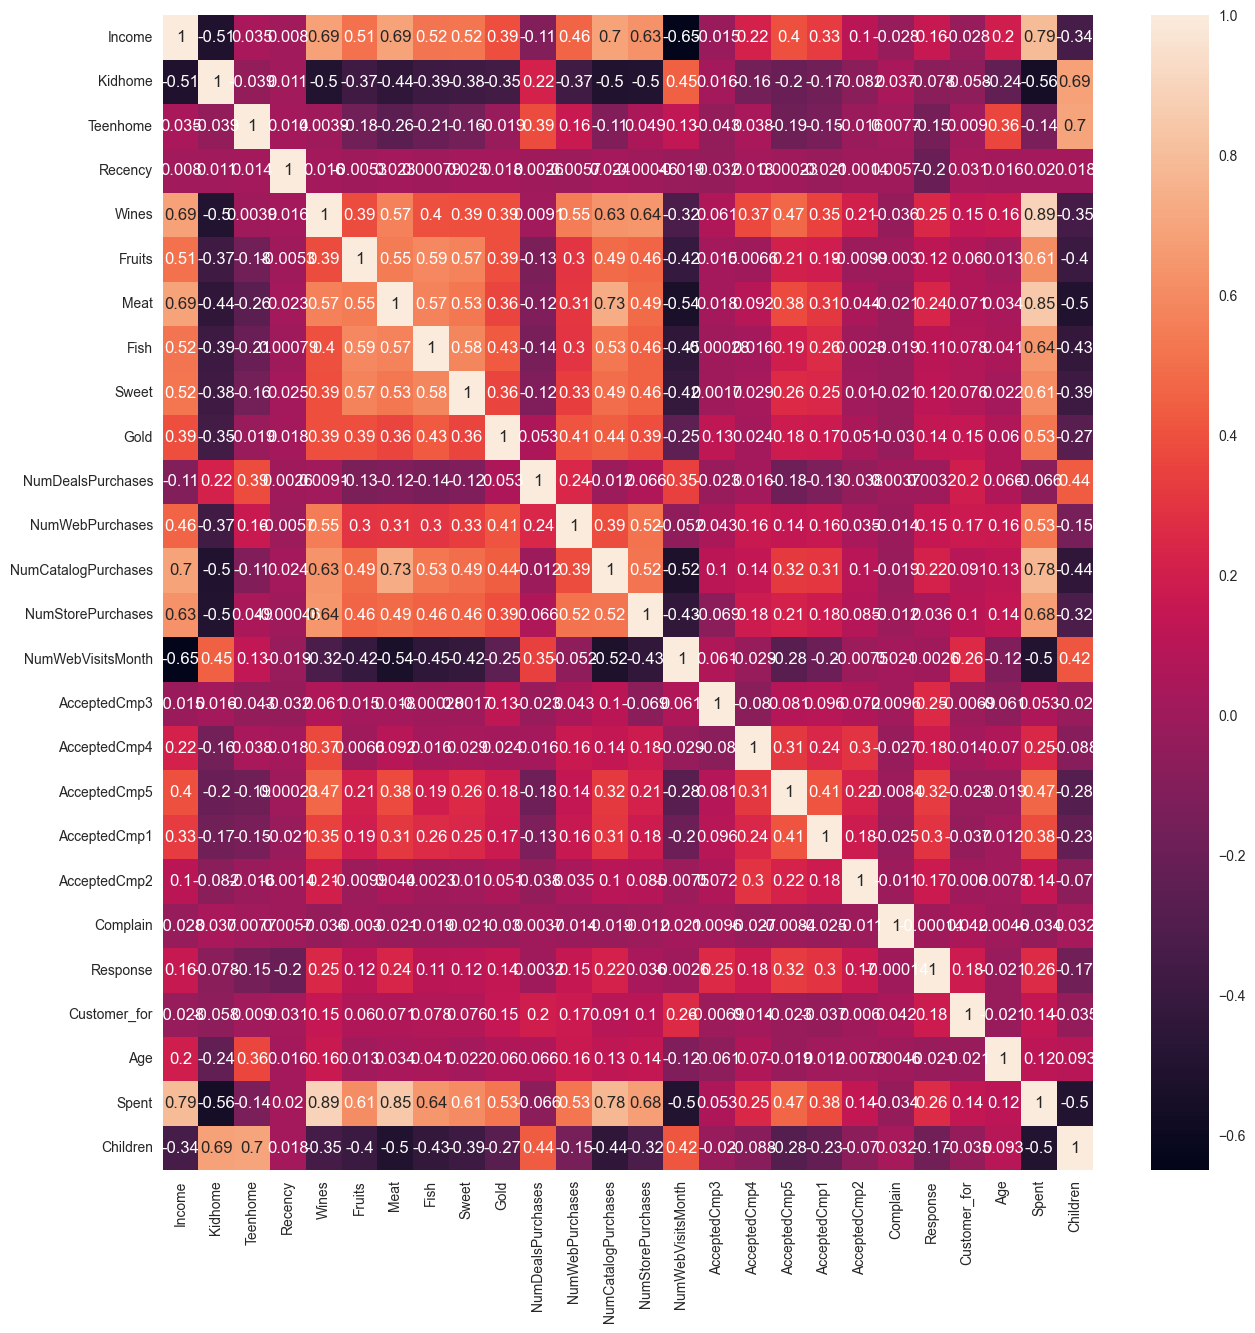

In [22]:
#  lets plot a correlation matrix
plt.figure(figsize = (15,15))
corr_matrix = data.corr()
sns.heatmap(corr_matrix , annot = True)

In [23]:
# we have two categorical columns here ------------
'''
    1.Education 2. Living with
    so we convert them into numerical using label encoder 
'''
s = data.dtypes == 'object'
object_cls = list(s[s].index)
LE =LabelEncoder()
for i in object_cls:
    data[i] = data[[i]].apply(LE.fit_transform)
# (Everything is converted to integer)    

# cheking the datatypes of column or features ---
data.dtypes

Education                int32
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
Wines                    int64
Fruits                   int64
Meat                     int64
Fish                     int64
Sweet                    int64
Gold                     int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Customer_for             int64
Age                      int64
Spent                    int64
Living_with              int32
Children                 int64
Family_size              int32
dtype: object

In [24]:
# let standardize our dataset 
# the standard Scaler standardize and normalize our datapts which make it easier for 
            # further processing by ml models and its better that all the datapts on same scale 
    

data_cpy= data.copy()

cols_to_remove = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']

data_cpy.drop(cols_to_remove, axis = 1 , inplace = True )

scaler= StandardScaler()

scaler.fit(data_cpy)

scaled_df = pd.DataFrame(scaler.transform(data_cpy),columns = data_cpy.columns)

In [25]:
scaled_df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweet,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_for,Age,Spent,Living_with,Children,Family_size
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,1.426865,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,0.0,-1.264598,0.0
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-1.126420,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,0.0,1.404572,0.0
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,1.426865,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.0,-1.264598,0.0
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.761665,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.0,0.069987,0.0
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.332600,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.0,0.069987,0.0


In [26]:
#  elbow using kmeans ++ 

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i , init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_df)
    
    wcss.append(kmeans.inertia_)

E:\python main\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\python main\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\python main\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\python main\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\python main\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default valu

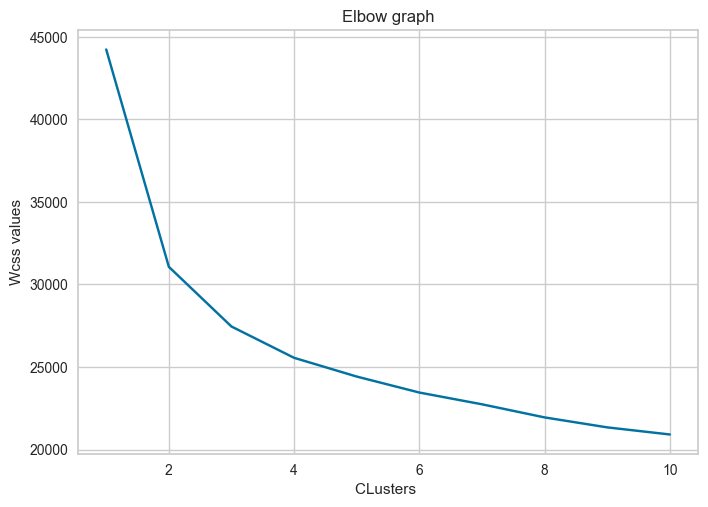

In [27]:
plt.plot(range(1,11) , wcss)
plt.title("Elbow graph")

plt.xlabel("CLusters ")
plt.ylabel('Wcss values')

plt.show()

Elbow Method to determine the number of clusters to be formed:


E:\python main\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\python main\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\python main\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\python main\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\python main\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default valu

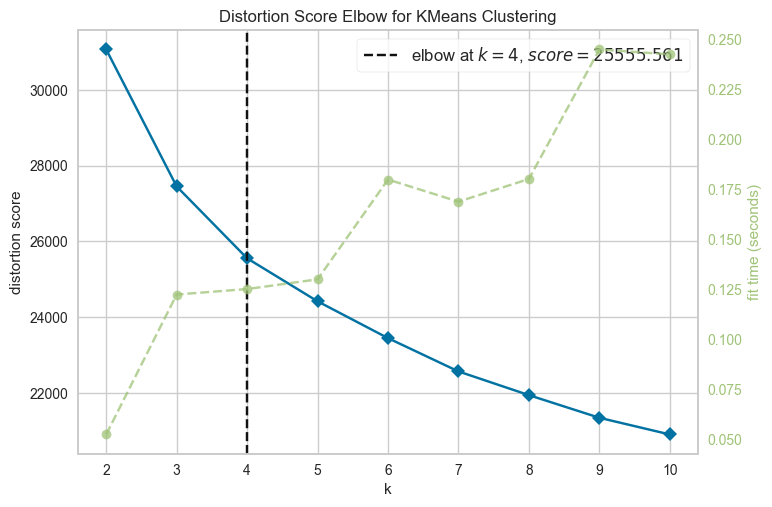

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# using KElbowVisualizer for getting the number of clusters 

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(scaled_df)
Elbow_M.show()

E:\python main\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


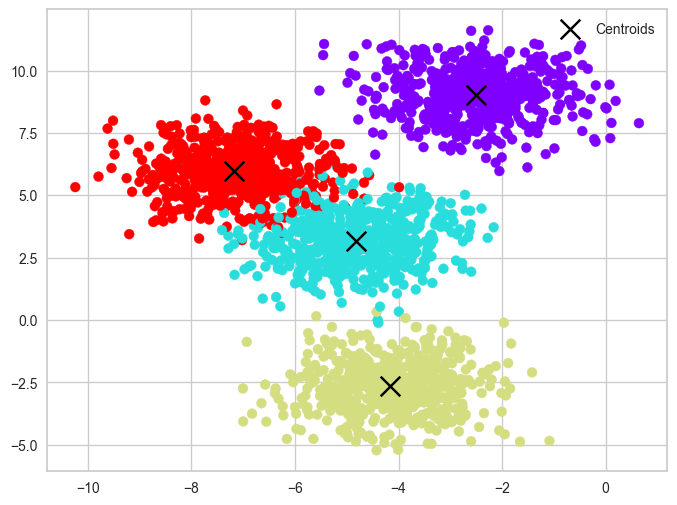

In [29]:
# plotting the clusters with the datasets 

from sklearn.datasets import make_blobs 

X, y = make_blobs(n_samples = 2212 , n_features = 22 , centers = 4 , random_state = 42)

kmeans = KMeans(n_clusters = 4 , random_state = 42)
cluster_labels = kmeans.fit_predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='rainbow', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x', s=200, label='Centroids')
plt.legend()
plt.show()




In [30]:
from sklearn.cluster import AgglomerativeClustering


#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(scaled_df)
scaled_df["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

<AxesSubplot: xlabel='Clusters', ylabel='count'>

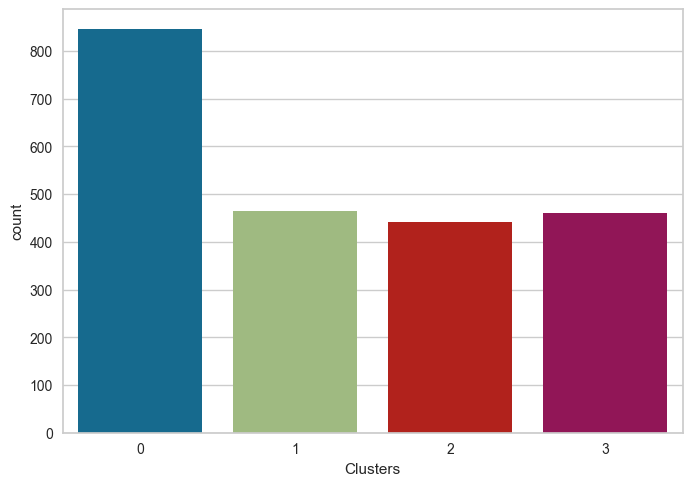

In [31]:
# Countplot of value_Counts of clusters 

sns.countplot(x = data.Clusters)

<AxesSubplot: xlabel='Spent', ylabel='Income'>

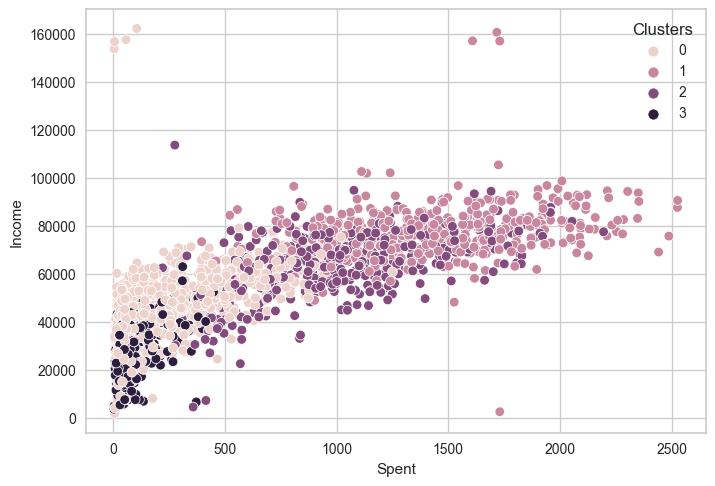

In [32]:
# Clusters profiles based on income and spendings 

sns.scatterplot(x = data.Spent , y = data.Income , hue = 'Clusters' , data = data )

In [33]:
data.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_for',
       'Age', 'Spent', 'Living_with', 'Children', 'Family_size', 'Clusters'],
      dtype='object')

Text(0.5, 0, 'No. of promotions Accepted!')

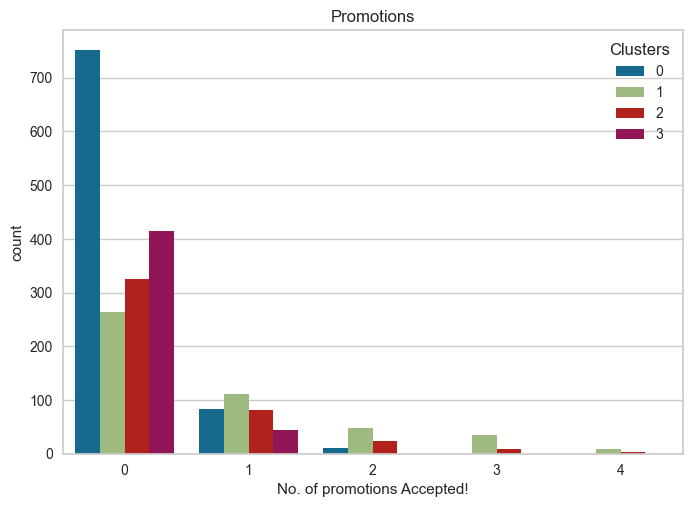

In [34]:
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]

sns.countplot(x = data.Total_Promos , hue = data.Clusters)
plt.title('Promotions')
plt.xlabel('No. of promotions Accepted!')

# getting customers on which we have to focus more , so for that we creates joint plots and gave hue = Clusters 

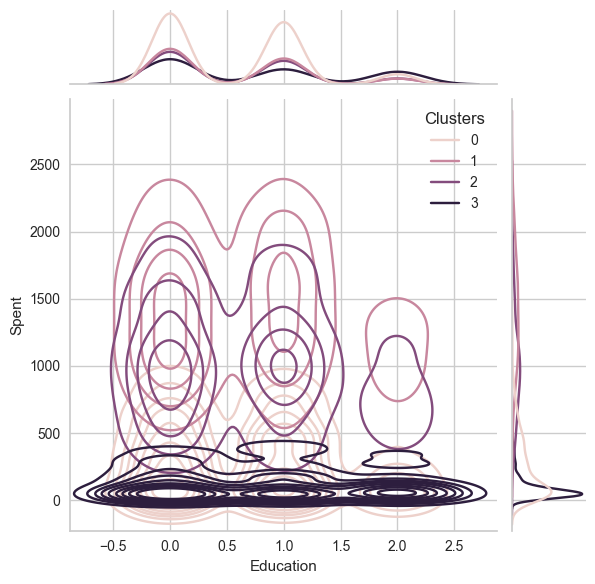

In [35]:
sns.jointplot(x = 'Education' , y = 'Spent' , hue = 'Clusters' , kind = 'kde', data = data)

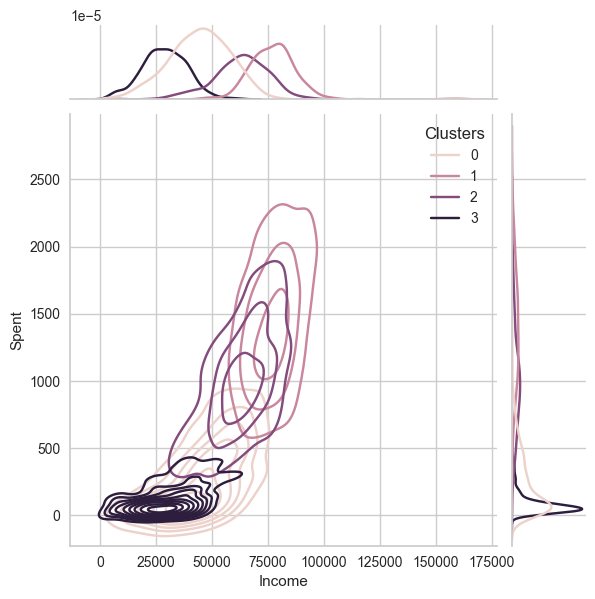

In [36]:
sns.jointplot(x = 'Income' , y = 'Spent' , hue = 'Clusters' , kind = 'kde', data = data)

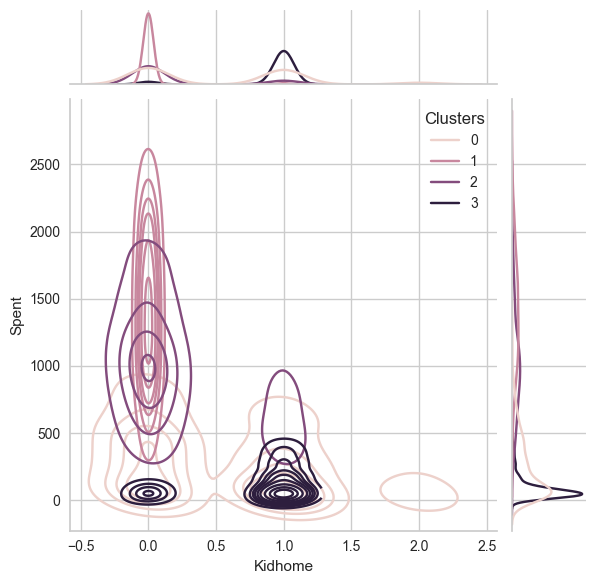

In [37]:
sns.jointplot(x = 'Kidhome' , y = 'Spent' , hue = 'Clusters' , kind = 'kde', data = data)

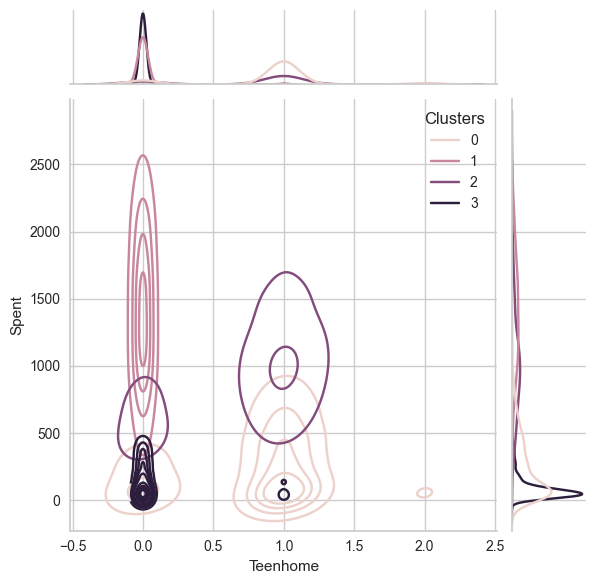

In [38]:
sns.jointplot(x = 'Teenhome' , y = 'Spent' , hue = 'Clusters' , kind = 'kde', data = data)

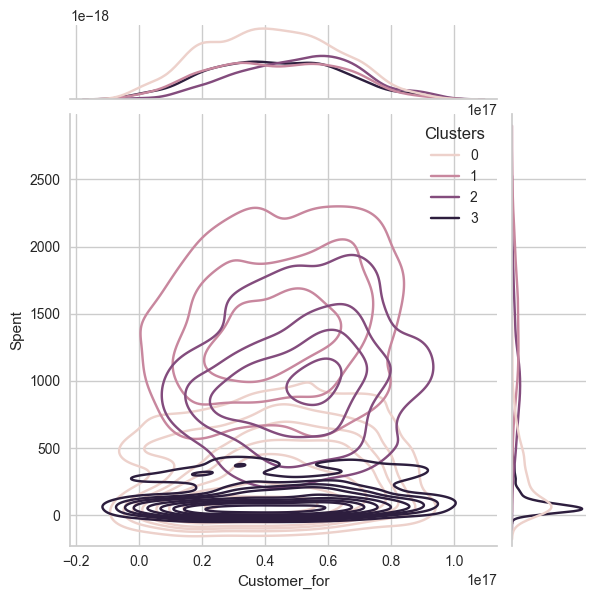

In [39]:
sns.jointplot(x = 'Customer_for' , y = 'Spent' , hue = 'Clusters' , kind = 'kde', data = data)